In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
import math

In [2]:
import datashader as ds, datashader.transfer_functions as tf
import dask.dataframe as dd

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)

In [5]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)
#background = "black"
background=None

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

In [6]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [7]:
corder = ['C1', 'C2', 'C3', 'C4', 'C0']

In [8]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH','MIN', ]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
mpalette = sns.color_palette(mpalette, n_colors=5)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [9]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Axenic',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [10]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [11]:
sns.color_palette('summer')

[(0.1411764705882353, 0.5705882352941176, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.42745098039215684, 0.7137254901960784, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.8588235294117647, 0.9294117647058824, 0.4)]

In [12]:
sns.palettes.QUAL_PALETTES

['tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'Set1',
 'Set2',
 'Set3',
 'Accent',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Dark2',
 'deep',
 'deep6',
 'muted',
 'muted6',
 'pastel',
 'pastel6',
 'bright',
 'bright6',
 'dark',
 'dark6',
 'colorblind',
 'colorblind6']

In [13]:
ccnorder = ['Bp', 'Np','Bh',  'Nh', 'DIN','DON',  'RDON', ]
ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DINCOLOR, DONCOLOR, RDONCOLOR, ]

#Hex Codes: #262842, #293961, #2C497F, #8897BD, #E3E4FA
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
#Hex Codes: #5E1525, #C74F29, #E99E46, #B6C38D, #828144
ccnpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#262842', '#2C497F', '#8897BD']
#ccnpalette = ['#828144', '#B6C38D', '#E99E46', '#E7BB96', '#262842', '#2C497F', '#8897BD']
cccorder = ['Bp[C]', 'Cp','Bh[C]',  'Ch', 'DIC','DOC',  'RDOC', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DICCOLOR, DOCCOLOR, RDOCCOLOR, ]
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
cccpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#DF5F35', '#EF9E84', '#ffd8d1']

sns.color_palette(cccpalette)

[(0.1843137254901961, 0.403921568627451, 0.3333333333333333),
 (0.596078431372549, 0.6509803921568628, 0.6039215686274509),
 (0.49019607843137253, 0.3607843137254902, 0.32941176470588235),
 (0.9058823529411765, 0.7333333333333333, 0.5882352941176471),
 (0.8745098039215686, 0.37254901960784315, 0.20784313725490197),
 (0.9372549019607843, 0.6196078431372549, 0.5176470588235295),
 (1.0, 0.8470588235294118, 0.8196078431372549)]

In [14]:
gorder1 = ['Strong', 'Sustained', 'Weak','Inhibited',  ]
gpalette1 = gpalette[:2] + [gpalette[3], gpalette[2], ]
sns.color_palette(gpalette1)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [15]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [16]:
refdf = pd.read_excel('ML_model/reference_final.xlsx')

In [17]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = 'results'

In [ ]:
'monte_ponly_clean_sum.csv.gz'
'monte_strong_ponly_clean_sum.csv.gz'
'monte_ponly_add_OVERFLOW_clean_sum.csv.gz'
'monte_ponly_fix_OVERFLOW_clean_sum.csv.gz'
'ponly_monte_add_ROS_round2_clean_sum.csv.gz'


In [144]:
dpath = 'results'
sim_df1 = pd.read_csv(os.path.join(dpath,'monte_ponly_clean_sum.csv.gz',))
sim_df2 = pd.read_csv(os.path.join(dpath,'monte_strong_ponly_clean_sum.csv.gz',))
sim_df3 = pd.read_csv(os.path.join(dpath,'monte_ponly_fix_OVERFLOW_clean_sum.csv.gz',))
sim_df4 = pd.read_csv(os.path.join(dpath,'monte_ponly_add_OVERFLOW_clean_sum.csv.gz',))
#sim_df5 = pd.read_csv(os.path.join(dpath,'ponly_monte_add_ROS_round2_clean_sum.csv.gz',))


In [145]:
sim_df1['run'] = 'init_ponly'
sim_df2['run'] = 'add_ponly'
sim_df3['run'] = 'overflow_init_ponly'
sim_df4['run'] = 'overflow_add_ponly'


In [146]:
sim_df1[['id', 'media', 'which', 'model', 'hash']] =     sim_df1.run_id.str.rsplit('_', n=4, expand=True)
sim_df2[['id', 'media', 'which', 'model', 'hash']] =     sim_df2.run_id.str.rsplit('_', n=4, expand=True)
sim_df3[['id', 'media', 'which', 'model', 'hash']] =     sim_df3.run_id.str.rsplit('_', n=4, expand=True)
sim_df4[['id', 'media', 'which', 'model', 'hash']] =     sim_df4.run_id.str.rsplit('_', n=4, expand=True)


In [147]:
sim_df1['VPRO_nocluster'] = sim_df1.idx.str.replace('monte_ponly_','vpro_', regex=False)
sim_df1['VPRO_nocluster'] = sim_df1['VPRO_nocluster'].str.replace('_monte__','_', regex=False)
for m in morder:
    sim_df1['VPRO_nocluster'] = sim_df1['VPRO_nocluster'].str.replace(f'_{m}_','_', regex=False)


In [148]:
sim_df2['VPRO'] = sim_df2.idx.str.replace('monte2_ponly_','', regex=False)
sim_df2['VPRO'] = sim_df2['VPRO'].str.replace(r'_monte__(\d+)_[^_]+$', r'\1', regex=True)
sim_df2['VPRO'] = sim_df2['VPRO'].str.replace(r'.*_vpro', 'vpro', regex=True)


In [149]:
sim_df3['VPRO'] = sim_df3.idx.str.replace('monte_ponly_fix_OVERFLOW_','vpro_2_', regex=False)
sim_df3['VPRO'] = sim_df3['VPRO'].str.replace('_monte__','_', regex=False)
for m in morder:
    sim_df3['VPRO'] = sim_df3['VPRO'].str.replace(f'_{m}_','_', regex=False)


In [150]:
sim_df4['VPRO'] = sim_df4.idx.str.replace('monte2_ponly_OVERFLOW_','', regex=False)
sim_df4['VPRO'] = sim_df4['VPRO'].str.replace(r'_monte__(\d+)_[^_]+$', r'\1', regex=True)
sim_df4['VPRO'] = sim_df4['VPRO'].str.replace(r'.*_vpro', 'vpro', regex=True)


In [151]:
sim_df2['VPRO_nocluster'] = sim_df2['VPRO']
sim_df3['VPRO_nocluster'] = sim_df3['VPRO']
sim_df4['VPRO_nocluster'] = sim_df4['VPRO']



In [152]:
sim_df4.idx.unique()

array(['monte2_ponly_OVERFLOW_vpro_2_10_14_OVERFLOW__monte__13_OVERFLOW',
       'monte2_ponly_OVERFLOW_vpro_2_10_14_OVERFLOW__monte__6_OVERFLOW',
       'monte2_ponly_OVERFLOW_vpro_2_10_14_OVERFLOW__monte__40_OVERFLOW',
       ...,
       'monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__monte__89_OVERFLOW',
       'monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__monte__60_OVERFLOW',
       'monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__monte__75_OVERFLOW'],
      dtype=object)

In [153]:
sim_df3.VPRO.unique()

array(['vpro_2_33_91_OVERFLOW', 'vpro_2_85_7_OVERFLOW',
       'vpro_2_5_8_OVERFLOW', ..., 'vpro_2_53_7_OVERFLOW',
       'vpro_2_36_18_OVERFLOW', 'vpro_2_68_22_OVERFLOW'], dtype=object)

In [154]:
# remove buggy overflow simulations
sim_df11 = sim_df1.loc[~sim_df1.run_id.str.startswith('monte_ponly_OVERFLOW')]
sim_df22 = sim_df2.loc[~sim_df2.run_id.str.startswith('monte2_ponly_OVERFLOW')]


In [155]:
sim_df1.shape, sim_df11.shape, sim_df2.shape, sim_df22.shape, 

((99732, 56), (79744, 56), (7204, 57), (7204, 57))

In [156]:
df = pd.concat([
    sim_df11,
    sim_df22,
    sim_df3,
    sim_df4,
], ignore_index=True)

In [157]:
df

VmaxICp  VmaxICh   VmaxINp   VmaxINh  VmaxOCp       VmaxOCh  VmaxONp  \
0       0.000002      0.0  0.000003  0.000002      0.0  5.541667e-08      0.0   
1       0.000006      0.0  0.000035  0.000002      0.0  5.541667e-08      0.0   
2       0.000030      0.0  0.000010  0.000002      0.0  5.541667e-08      0.0   
3       0.000005      0.0  0.000006  0.000002      0.0  5.541667e-08      0.0   
4       0.000004      0.0  0.000007  0.000002      0.0  5.541667e-08      0.0   
...          ...      ...       ...       ...      ...           ...      ...   
112051  0.000024      0.0  0.000003  0.000067      0.0  6.666667e-05      0.0   
112052  0.000024      0.0  0.000003  0.000067      0.0  6.666667e-05      0.0   
112053  0.000024      0.0  0.000001  0.000067      0.0  6.666667e-05      0.0   
112054  0.000024      0.0  0.000033  0.000067      0.0  6.666667e-05      0.0   
112055  0.000009      0.0  0.000033  0.000067      0.0  6.666667e-05      0.0   

             VmaxONh        KICp  KICh  ...  \
0       4.277778e-08   37.000000   1.0  ...   
1       4.277778e-08   24.605317   1.0  ...   
2       4.277778e-08  215.112381   1.0  ...   
3       4.277778e-08    8.853069   1.0  ...   
4       4.277778e-08    7.193827   1.0  ...   
...              ...         ...   ...  ...   
112051  6.666667e-05   17.472225   1.0  ...   
112052  6.666667e-05   17.472225   1.0  ...   
112053  6.666667e-05  218.600753   1.0  ...   
112054  6.666667e-05  156.706778   1.0  ...   
112055  6.666667e-05  237.360589   1.0  ...   

                                                   run_id  \
0       monte_ponly_EXOENZYME_76_monte__69_pro99_ponly...   
1       monte_ponly_EXOENZYME_86_monte__38_lowN_ponly_...   
2       monte_ponly_EXOENZYME_29_monte__60_pro99_ponly...   
3       monte_ponly_EXOENZYME_23_monte__20_lowN_ponly_...   
4       monte_ponly_EXOENZYME_20_monte__81_lowN_ponly_...   
...                                                   ...   
112051  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...   
112052  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...   
112053  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...   
112054  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...   
112055  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...   

                                                      idx                 run  \
0            monte_ponly_EXOENZYME_76_monte__69_EXOENZYME          init_ponly   
1            monte_ponly_EXOENZYME_86_monte__38_EXOENZYME          init_ponly   
2            monte_ponly_EXOENZYME_29_monte__60_EXOENZYME          init_ponly   
3            monte_ponly_EXOENZYME_23_monte__20_EXOENZYME          init_ponly   
4            monte_ponly_EXOENZYME_20_monte__81_EXOENZYME          init_ponly   
...                                                   ...                 ...   
112051  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...  overflow_add_ponly   
112052  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...  overflow_add_ponly   
112053  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...  overflow_add_ponly   
112054  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...  overflow_add_ponly   
112055  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...  overflow_add_ponly   

                                                       id  media  which  \
0                      monte_ponly_EXOENZYME_76_monte__69  pro99  ponly   
1                      monte_ponly_EXOENZYME_86_monte__38   lowN  ponly   
2                      monte_ponly_EXOENZYME_29_monte__60  pro99  ponly   
3                      monte_ponly_EXOENZYME_23_monte__20   lowN  ponly   
4                      monte_ponly_EXOENZYME_20_monte__81   lowN  ponly   
...                                                   ...    ...    ...   
112051  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...   lowN  ponly   
112052  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...  pro99  ponly   
112053  monte2_ponly_OVERFLOW_vpro_2_97_16_OVERFLOW__m...   lowN  ponly   
112054  monte2_

In [158]:
df[['run', 'media']].value_counts()

run                  media
init_ponly           lowN     39872
                     pro99    39872
overflow_init_ponly  lowN      9955
                     pro99     9955
add_ponly            lowN      3602
                     pro99     3602
overflow_add_ponly   lowN      2599
                     pro99     2599
Name: count, dtype: int64

In [159]:
df = df.loc[df.media.isin(['lowN'])].copy()

In [160]:
df[['run', 'model']].value_counts()

run                  model    
init_ponly           MIXOTROPH    9997
                     EXOENZYME    9959
                     MIN          9958
                     ROS          9958
overflow_init_ponly  OVERFLOW     9955
add_ponly            EXOENZYME    2607
overflow_add_ponly   OVERFLOW     2599
add_ponly            ROS           995
Name: count, dtype: int64

In [161]:
vpro_df = pd.read_csv('ML_model/versatile_vpros.csv')

In [162]:
vpro_df['VPRO_nocluster'] =  vpro_df.VPRO.str.replace(r'_C\d$', '', regex=True)

In [163]:
vpro_df

Unnamed: 0      model  iteration                     VPRO  Axenic  \
0              0  EXOENZYME          1  vpro_11_62_EXOENZYME_C1      15   
1              1  EXOENZYME          1  vpro_12_88_EXOENZYME_C2      16   
2              2  EXOENZYME          1   vpro_13_4_EXOENZYME_C3     102   
3              3  EXOENZYME          1  vpro_13_69_EXOENZYME_C1      94   
4              4  EXOENZYME          1  vpro_17_89_EXOENZYME_C2       0   
...          ...        ...        ...                      ...     ...   
1273        1273        ROS          2    vpro_19_33_ROS_C0_979       3   
1274        1274        ROS          2    vpro_19_33_ROS_C0_980       0   
1275        1275        ROS          2    vpro_19_33_ROS_C0_988       2   
1276        1276        ROS          2    vpro_19_33_ROS_C0_994       5   
1277        1277        ROS          2    vpro_19_33_ROS_C0_999       0   

      Inhibited  Other  Strong  Sustained  Weak  pos_interaction  \
0             0      8       0         63    81               63   
1             0      0       0          0    34                0   
2             0      0       0          0     0                0   
3             1      0       0        104    12              104   
4             0      0       0          0    46                0   
...         ...    ...     ...        ...   ...              ...   
1273          0     35       0          0     1                0   
1274          0     13      38          1     1               39   
1275          0     35       4          0     0                4   
1276          0      6       0          0     1                0   
1277          0      0       0          0    13                0   

      neg_interaction  Versatile         VPRO_nocluster  
0                  81       True   vpro_11_62_EXOENZYME  
1                  34      False   vpro_12_88_EXOENZYME  
2                   0      False    vpro_13_4_EXOENZYME  
3                  13       True   vpro_13_69_EXOENZYME  
4                  46      False   vpro_17_89_EXOENZYME  
...               ...        ...                    ...  
1273                1      False  vpro_19_33_ROS_C0_979  
1274                1       True  vpro_19_33_ROS_C0_980  
1275                0      False  vpro_19_33_ROS_C0_988  
1276                1      False  vpro_19_33_ROS_C0_994  
1277               13      False  vpro_19_33_ROS_C0_999  

[1278 rows x 14 columns]

In [164]:
sim_df3.VPRO_nocluster.unique()

array(['vpro_2_33_91_OVERFLOW', 'vpro_2_85_7_OVERFLOW',
       'vpro_2_5_8_OVERFLOW', ..., 'vpro_2_53_7_OVERFLOW',
       'vpro_2_36_18_OVERFLOW', 'vpro_2_68_22_OVERFLOW'], dtype=object)

In [165]:
vpro_df.loc[
    #~vpro_df.VPRO.isin(df.VPRO) 
    ~vpro_df.VPRO_nocluster.isin(df.VPRO_nocluster)
] #[['model', 'iteration']].value_counts()


Empty DataFrame
Columns: [Unnamed: 0, model, iteration, VPRO, Axenic, Inhibited, Other, Strong, Sustained, Weak, pos_interaction, neg_interaction, Versatile, VPRO_nocluster]
Index: []

In [168]:
vpro_df['Versatile_STR'] = vpro_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })

In [166]:
df.columns

Index(['VmaxICp', 'VmaxICh', 'VmaxINp', 'VmaxINh', 'VmaxOCp', 'VmaxOCh',
       'VmaxONp', 'VmaxONh', 'KICp', 'KICh', 'KINp', 'KINh', 'KOCp', 'KOCh',
       'KONp', 'KONh', 'Mp', 'Mh', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'QCmaxp',
       'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp', 'Kmtbh', 'bp', 'bh', 'r0p',
       'r0h', 'KdecayDON', 'KprodEXOp', 'KprodEXOh', 'OverflowMode',
       'Koverflowp', 'Koverflowh', 'ROSMode', 'KprodROSp', 'KprodROSh',
       'KlossROSp', 'KlossROSh', 'KdecayROS', 'omegaP', 'omegaH', 'ROSmaxD',
       'run_id', 'idx', 'run', 'id', 'media', 'which', 'model', 'hash',
       'VPRO_nocluster', 'VPRO'],
      dtype='object')

In [170]:
df = pd.merge(df, vpro_df[['VPRO_nocluster', 'Versatile_STR']], on='VPRO_nocluster', how='left')



In [174]:
df['Versatile_STR'] = df.Versatile_STR.fillna('Not VPRO')

In [175]:
df['Versatile_STR'].value_counts()


Versatile_STR
Not VPRO              54750
Non-Versatile VPRO      979
Versatile VPRO          299
Name: count, dtype: int64

In [176]:
df = df.reset_index(drop=True)

In [177]:
df.groupby(['model', 'VPRO']).size() #.value_counts()

model      VPRO                      
EXOENZYME  vpro_11_62_EXOENZYME_C1_0     1
           vpro_11_62_EXOENZYME_C1_1     1
           vpro_11_62_EXOENZYME_C1_10    1
           vpro_11_62_EXOENZYME_C1_11    1
           vpro_11_62_EXOENZYME_C1_12    1
                                        ..
ROS        vpro_19_33_ROS_C0_995         1
           vpro_19_33_ROS_C0_996         1
           vpro_19_33_ROS_C0_997         1
           vpro_19_33_ROS_C0_998         1
           vpro_19_33_ROS_C0_999         1
Length: 16156, dtype: int64

In [179]:
df.columns

Index(['VmaxICp', 'VmaxICh', 'VmaxINp', 'VmaxINh', 'VmaxOCp', 'VmaxOCh',
       'VmaxONp', 'VmaxONh', 'KICp', 'KICh', 'KINp', 'KINh', 'KOCp', 'KOCh',
       'KONp', 'KONh', 'Mp', 'Mh', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'QCmaxp',
       'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp', 'Kmtbh', 'bp', 'bh', 'r0p',
       'r0h', 'KdecayDON', 'KprodEXOp', 'KprodEXOh', 'OverflowMode',
       'Koverflowp', 'Koverflowh', 'ROSMode', 'KprodROSp', 'KprodROSh',
       'KlossROSp', 'KlossROSh', 'KdecayROS', 'omegaP', 'omegaH', 'ROSmaxD',
       'run_id', 'idx', 'run', 'id', 'media', 'which', 'model', 'hash',
       'VPRO_nocluster', 'VPRO', 'Versatile_STR'],
      dtype='object')

In [180]:
id_vars=[
    'run_id', 'idx', 'run', 'id',  'model', 
       'VPRO_nocluster',  'Versatile_STR'
       ]
def _get_params_df(model):
    pparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'PRO')
    param_vals_map = get_param_vals(model)
    
    params_to_update = [p for p in pparams_to_update if p in df.columns]

    param_vals_df = df.loc[df.model.isin([model]), 
                                id_vars + pparams_to_update ]
    mparam_vals = param_vals_df.melt( id_vars=id_vars)    
    mparam_vals['default'] = mparam_vals['variable'].map(param_vals_map)
    mparam_vals['FC'] = np.log2(mparam_vals.value / mparam_vals.default)
    return mparam_vals
mparams_df = pd.concat([_get_params_df(model) for model in morder], ignore_index=True)

In [214]:
mparams_df.loc[mparams_df.model.isin(['ROS']), 'model1'] = 'ROS'
mparams_df.loc[mparams_df.model.isin(['OVERFLOW', 'EXOENZYME']), 'model1'] = 'OVERFLOW/EXOENZYME'


In [181]:
mparams_df

run_id  \
0       monte_ponly_EXOENZYME_86_monte__38_lowN_ponly_...   
1       monte_ponly_EXOENZYME_23_monte__20_lowN_ponly_...   
2       monte_ponly_EXOENZYME_20_monte__81_lowN_ponly_...   
3       monte_ponly_EXOENZYME_77_monte__35_lowN_ponly_...   
4       monte_ponly_EXOENZYME_35_monte__45_lowN_ponly_...   
...                                                   ...   
421564  monte_ponly_MIN_46_monte__45_lowN_ponly_MIN_h-...   
421565  monte_ponly_MIN_95_monte__88_lowN_ponly_MIN_h-...   
421566  monte_ponly_MIN_34_monte__9_lowN_ponly_MIN_h-4...   
421567  monte_ponly_MIN_67_monte__91_lowN_ponly_MIN_h-...   
421568  monte_ponly_MIN_13_monte__27_lowN_ponly_MIN_h-...   

                                                 idx         run  \
0       monte_ponly_EXOENZYME_86_monte__38_EXOENZYME  init_ponly   
1       monte_ponly_EXOENZYME_23_monte__20_EXOENZYME  init_ponly   
2       monte_ponly_EXOENZYME_20_monte__81_EXOENZYME  init_ponly   
3       monte_ponly_EXOENZYME_77_monte__35_EXOENZYME  init_ponly   
4       monte_ponly_EXOENZYME_35_monte__45_EXOENZYME  init_ponly   
...                                              ...         ...   
421564              monte_ponly_MIN_46_monte__45_MIN  init_ponly   
421565              monte_ponly_MIN_95_monte__88_MIN  init_ponly   
421566               monte_ponly_MIN_34_monte__9_MIN  init_ponly   
421567              monte_ponly_MIN_67_monte__91_MIN  init_ponly   
421568              monte_ponly_MIN_13_monte__27_MIN  init_ponly   

                                        id      model        VPRO_nocluster  \
0       monte_ponly_EXOENZYME_86_monte__38  EXOENZYME  vpro_86_38_EXOENZYME   
1       monte_ponly_EXOENZYME_23_monte__20  EXOENZYME  vpro_23_20_EXOENZYME   
2       monte_ponly_EXOENZYME_20_monte__81  EXOENZYME  vpro_20_81_EXOENZYME   
3       monte_ponly_EXOENZYME_77_monte__35  EXOENZYME  vpro_77_35_EXOENZYME   
4       monte_ponly_EXOENZYME_35_monte__45  EXOENZYME  vpro_35_45_EXOENZYME   
...                                    ...        ...                   ...   
421564        monte_ponly_MIN_46_monte__45        MIN        vpro_46_45_MIN   
421565        monte_ponly_MIN_95_monte__88        MIN        vpro_95_88_MIN   
421566         monte_ponly_MIN_34_monte__9        MIN         vpro_34_9_MIN   
421567        monte_ponly_MIN_67_monte__91        MIN        vpro_67_91_MIN   
421568        monte_ponly_MIN_13_monte__27        MIN        vpro_13_27_MIN   

       Versatile_STR variable     value   default        FC  
0           Not VPRO  VmaxICp  0.000006  0.000006  0.000000  
1           Not VPRO  VmaxICp  0.000005  0.000006 -0.277900  
2           Not VPRO  VmaxICp  0.000004  0.000006 -0.312912  
3           Not VPRO  VmaxICp  0.000006  0.000006  0.000000  
4           Not VPRO  VmaxICp  0.000054  0.000006  3.281868  
...              ...      ...       ...       ...       ...  
421564      Not VPRO  gammaDp  0.204770  0.800000 -1.965994  
421565      Not VPRO  gammaDp  0.214862  0.800000 -1.896588  
421566      Not VPRO  gammaDp  0.800000  0.800000  0.000000  
421567      Not VPRO  gammaDp  0.800000  0.800000  0.000000  
421568      Not VPRO  gammaDp  0.852159  0.800000  0.091123  

[421569 rows x 11 columns]

In [202]:
df.Versatile_STR.unique()
vorder = ['Not VPRO', 'Non-Versatile VPRO', 'Versatile VPRO', ]
vpalette = ['#FEC7B4', '#FF8E8F', '#9c110b']
vpalette = ['grey', 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

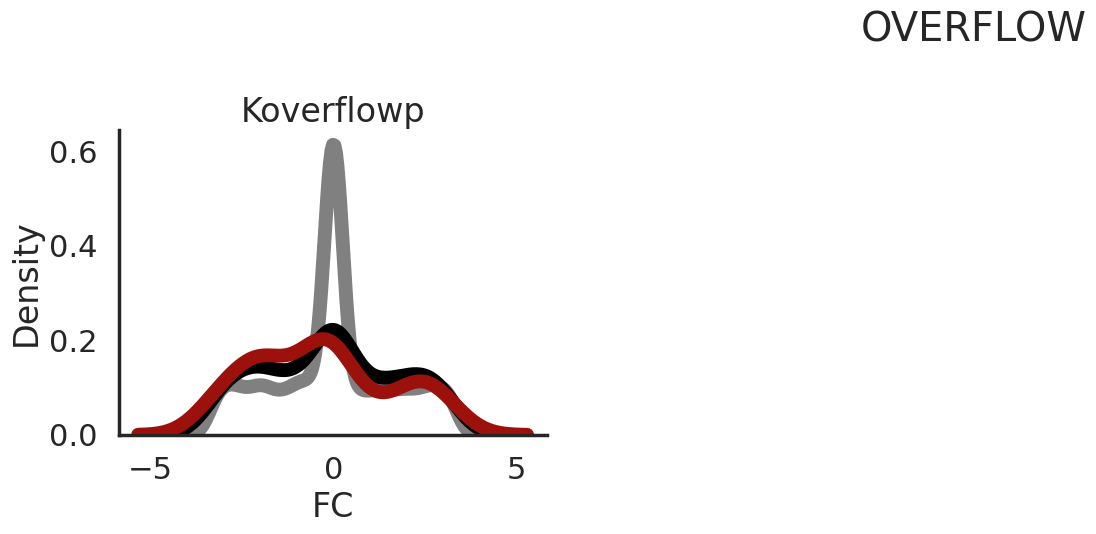

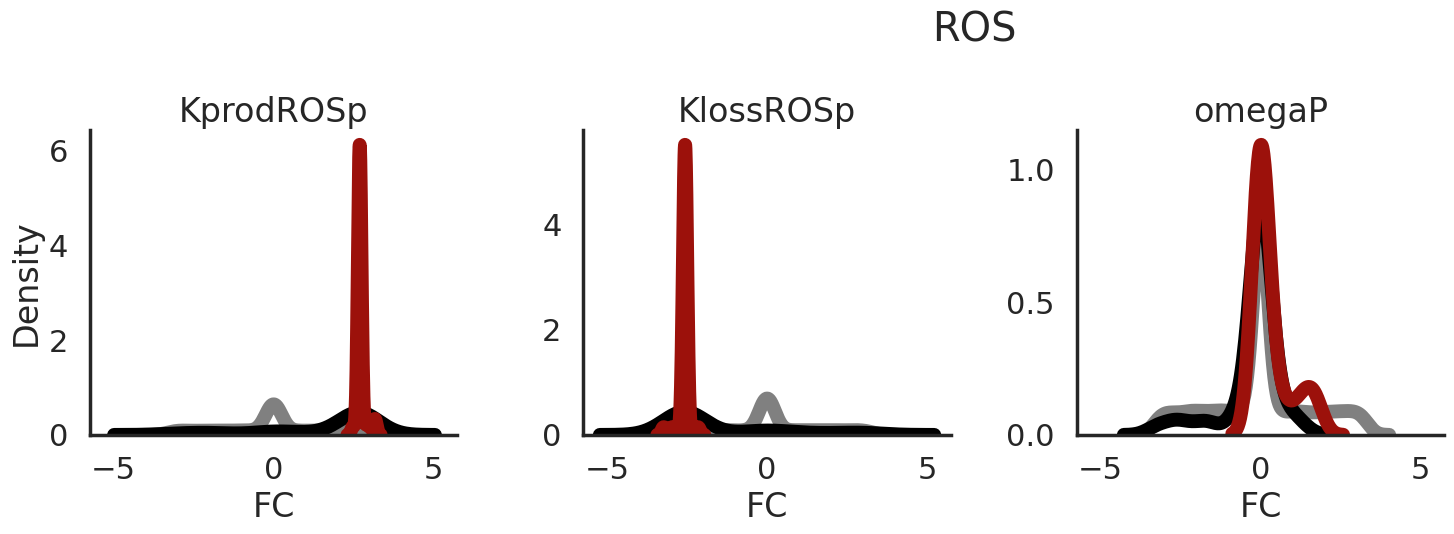

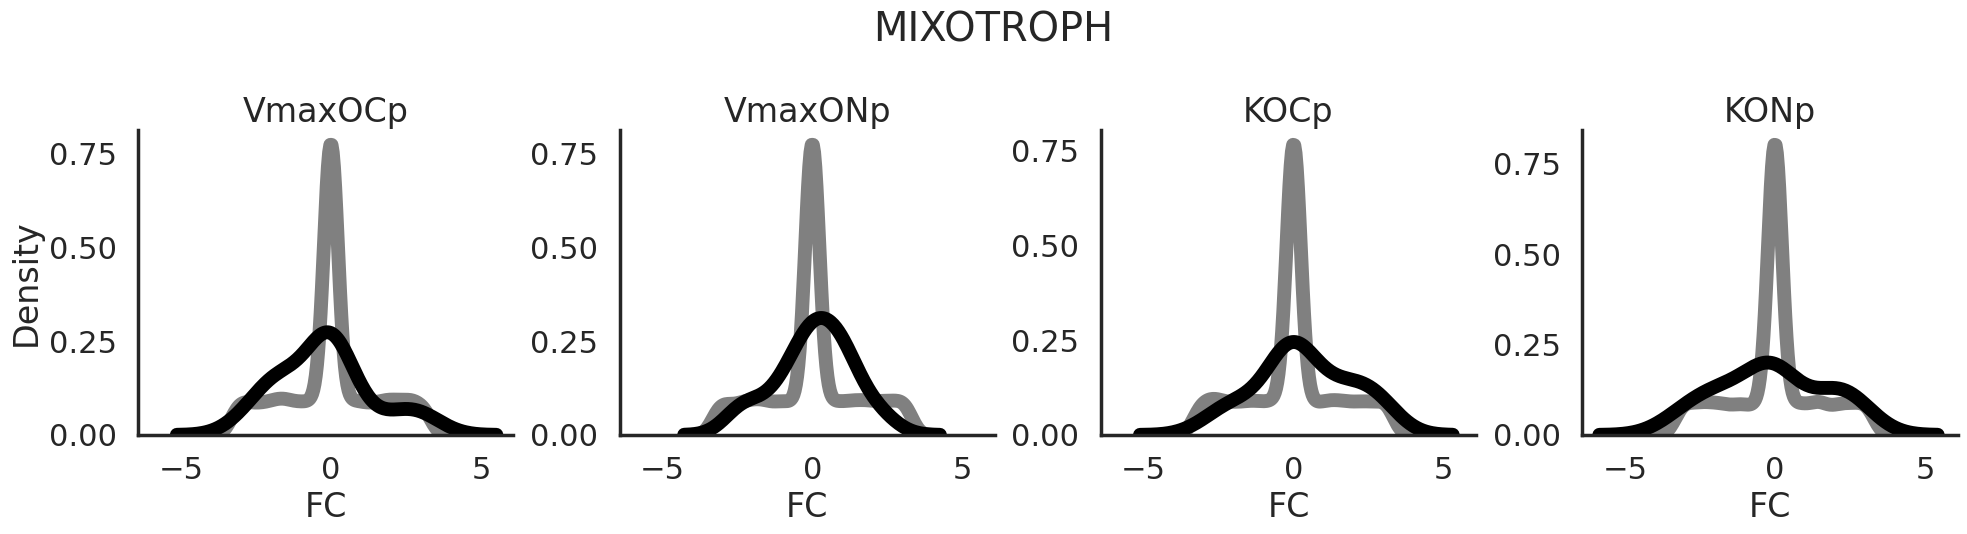

In [207]:
sns.set_context('poster')
min_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')

for model in morder:
    cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values(model, 'PRO')
    cur_pro_params_to_update = [p for p in cur_pro_params_to_update if p not in min_pro_params_to_update]
    if cur_pro_params_to_update:
        sns.displot(
            data=mparams_df.loc[ 
                ~mparams_df['FC'].isna() & 
                mparams_df['variable'].isin(cur_pro_params_to_update) &
                mparams_df['model'].isin([model]) 
    
                               ].reset_index(), 
            common_norm=False,
            col='variable', x='FC', col_wrap=4, #order=gorder,
            hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
            lw=10,
            kind='kde',
            facet_kws=dict(sharey=False),
            col_order=cur_pro_params_to_update,
            legend=False,
        ).set_titles(col_template='{col_name}', row_template='{row_name}')
        plt.suptitle(model, y=1.1)

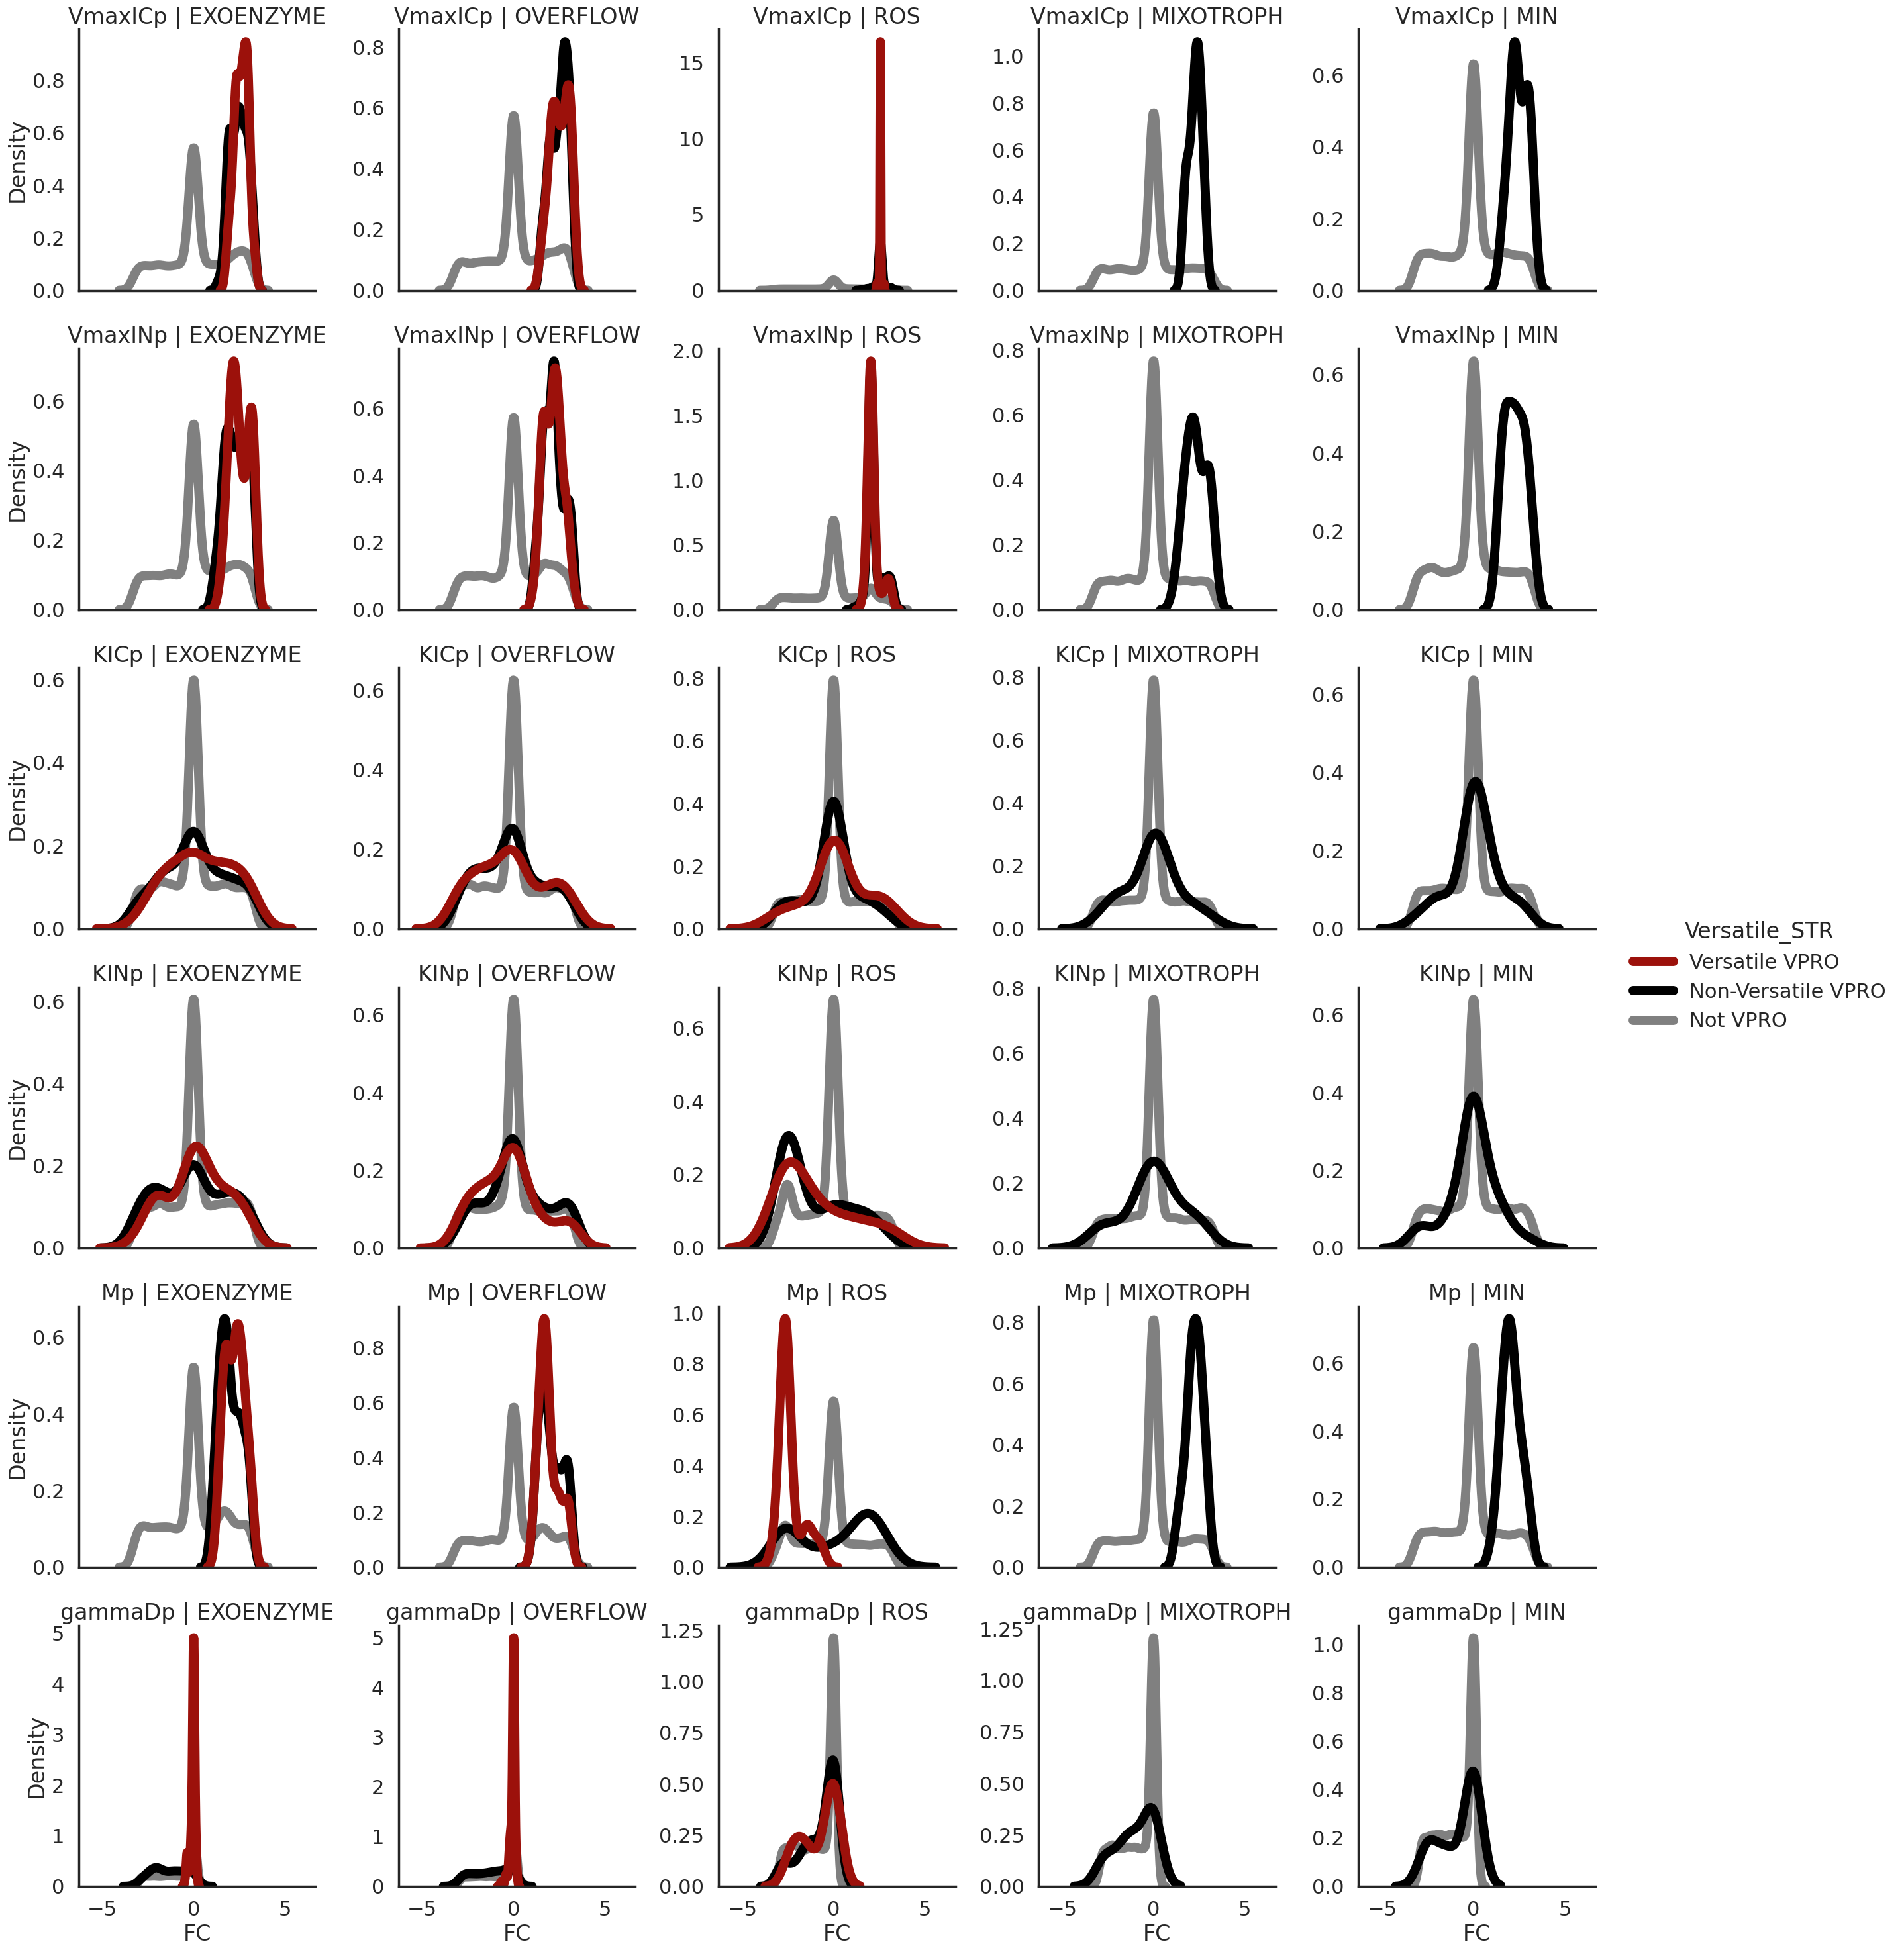

In [205]:
sns.set_context('poster')
cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')
sns.displot(
    data=mparams_df.loc[ 
        ~mparams_df['FC'].isna() & 
        mparams_df['variable'].isin(cur_pro_params_to_update) #&
        #mparams_df['model'].isin([model]) 

                       ].reset_index(), 
    common_norm=False,
    row='variable', x='FC', row_order=cur_pro_params_to_update,
    col='model', col_order=morder,
    hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
    lw=10,
    kind='kde',
    facet_kws=dict(sharey=False),
).set_titles(col_template='{col_name}', row_template='{row_name}')


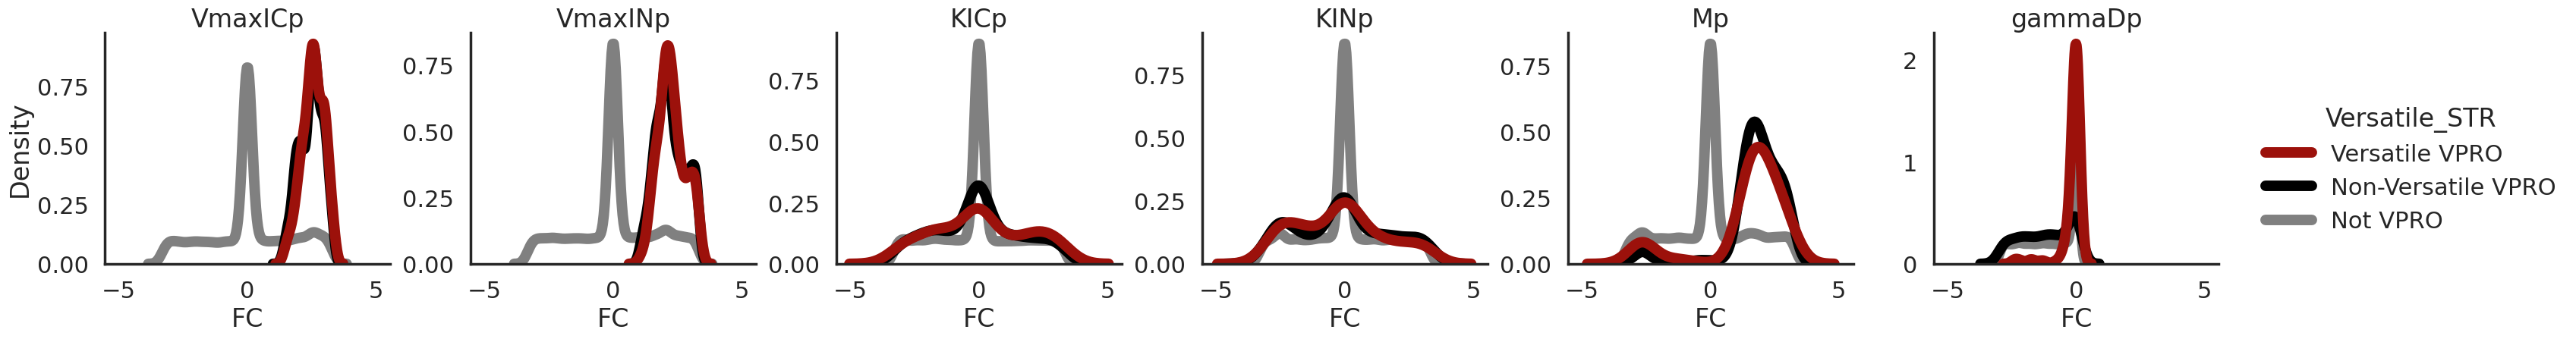

In [213]:
sns.set_context('poster')
cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')
sns.displot(
    data=mparams_df.loc[ 
        ~mparams_df['FC'].isna() & 
        mparams_df['variable'].isin(cur_pro_params_to_update) #&
        #mparams_df['model'].isin([model]) 

                       ].reset_index(), 
    common_norm=False,
    col='variable', x='FC', col_order=cur_pro_params_to_update,
    #col='model', col_order=morder,
    hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
    lw=10,
    kind='kde',
    facet_kws=dict(sharey=False),
).set_titles(col_template='{col_name}', row_template='{row_name}')


In [216]:
cur_pro_params_to_update

['VmaxICp', 'VmaxINp', 'KICp', 'KINp', 'Mp', 'gammaDp']

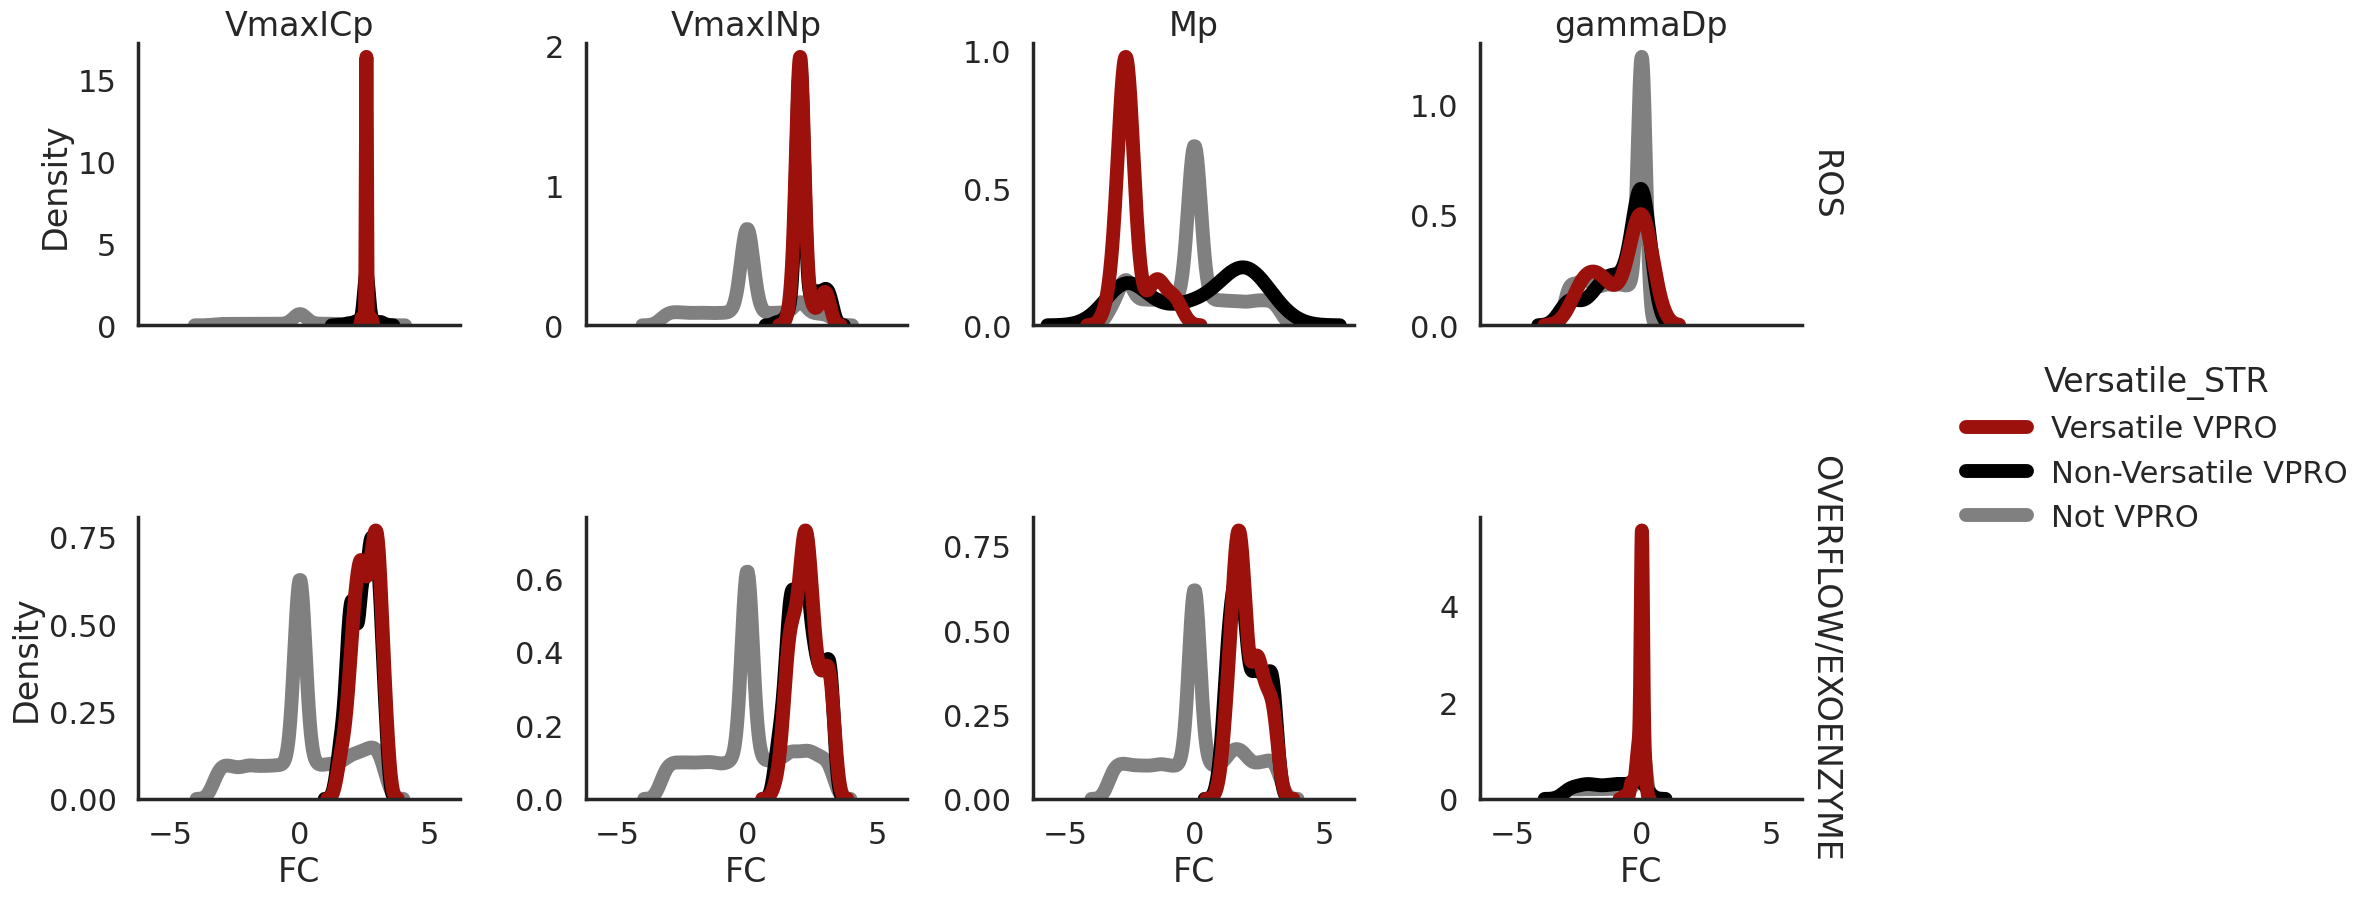

In [218]:
sns.set_context('poster')
porder = ['VmaxICp', 'VmaxINp', 'Mp', 'gammaDp']
sns.displot(
    data=mparams_df.loc[ 
        ~mparams_df['FC'].isna() & 
        mparams_df['variable'].isin(porder) #&
        #mparams_df['model'].isin([model]) 

                       ].reset_index(), 
    common_norm=False,
    col='variable', x='FC', col_order=porder,
    row='model1', row_order=['ROS', 'OVERFLOW/EXOENZYME'],
    hue='Versatile_STR', hue_order=reversed(vorder), palette=reversed(vpalette),
    lw=10,
    kind='kde', 
    facet_kws=dict(sharey=False, margin_titles=True),
).set_titles(col_template='{col_name}', row_template='{row_name}')


In [223]:
pmparams_df = mparams_df.pivot(
    index=id_vars + ['model1'],
    columns='variable', values='FC'
)

In [224]:
pmparams_df = pmparams_df.reset_index()

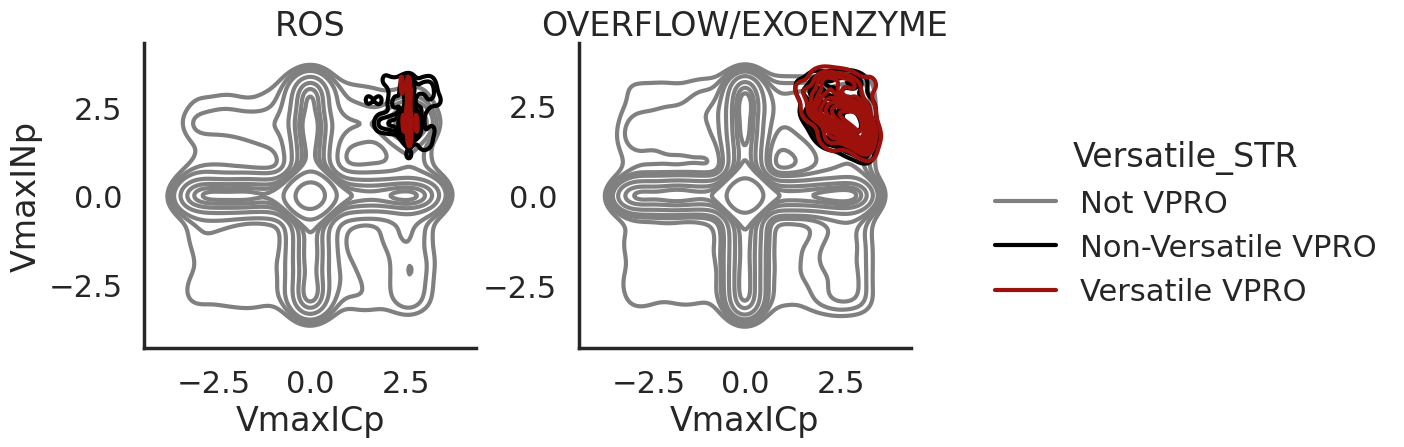

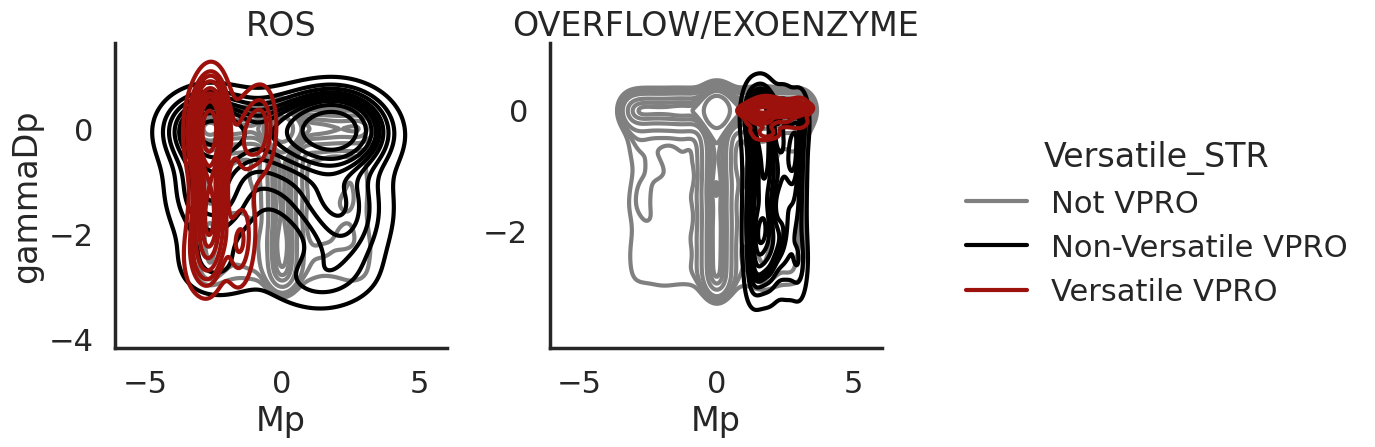

In [226]:
sns.set_context('poster')
 
for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
    sns.displot(
        data=pmparams_df, 
        common_norm=False,
        x=i, y=j,
        col='model1', col_order=['ROS', 'OVERFLOW/EXOENZYME'],
        hue='Versatile_STR', hue_order=vorder, palette=vpalette,
        #lw=10,
        kind='kde', 
        facet_kws=dict(sharey=False, margin_titles=True),
    ).set_titles(col_template='{col_name}', row_template='{row_name}')


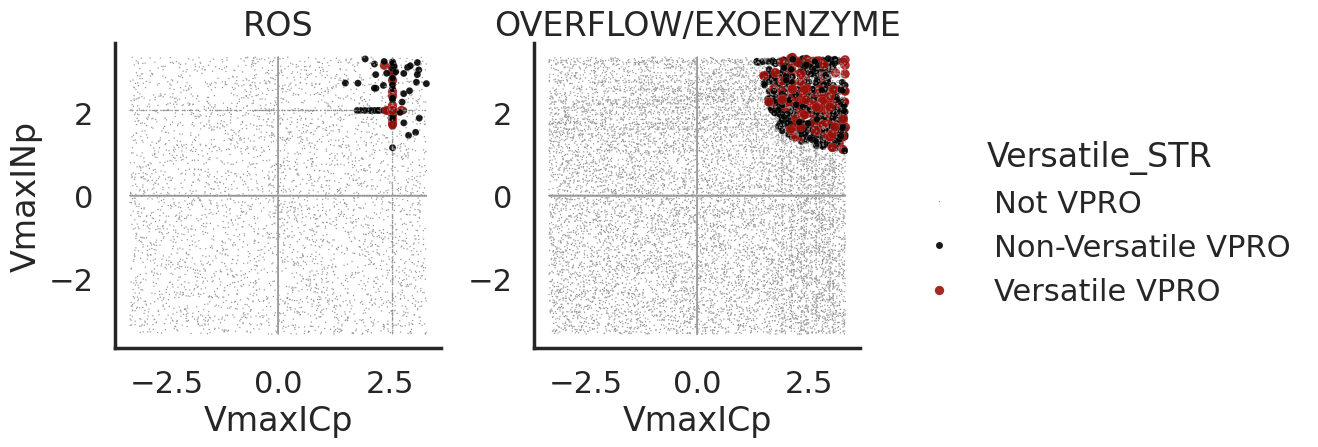

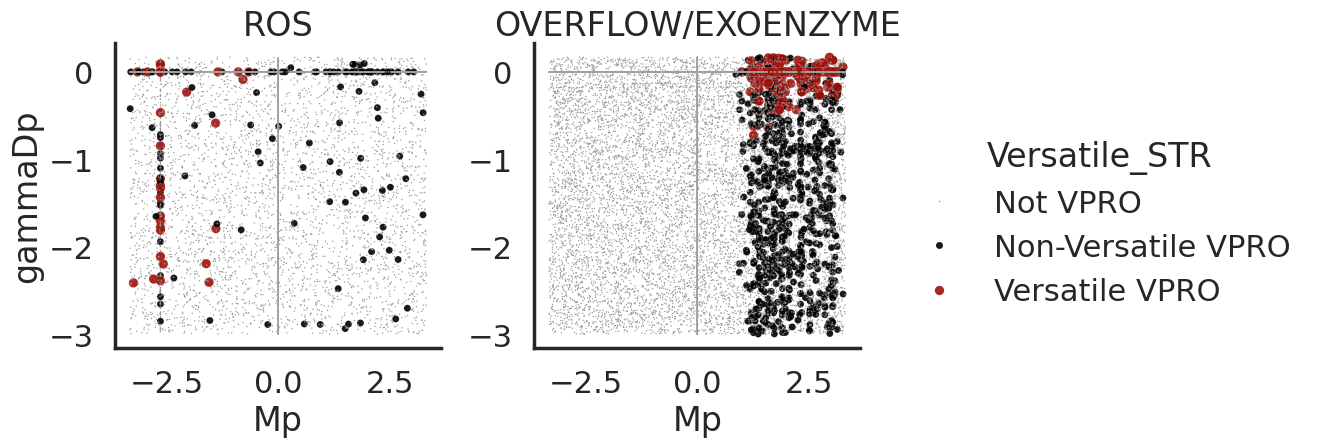

In [233]:
sns.set_context('poster')
 
for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
    sns.relplot(
        data=pmparams_df, 
        #common_norm=False,
        x=i, y=j,
        col='model1', col_order=['ROS', 'OVERFLOW/EXOENZYME'],
        hue='Versatile_STR', hue_order=vorder, palette=vpalette,
        #s=10,
        size='Versatile_STR', sizes=dict(zip(vorder, [1, 25,45])), alpha=0.9,
        #lw=10,
        #kind='kde', 
        facet_kws=dict(sharey=False, margin_titles=True),
    ).set_titles(col_template='{col_name}', row_template='{row_name}')


In [235]:
pmparams_df.columns

Index(['run_id', 'idx', 'run', 'id', 'model', 'VPRO_nocluster',
       'Versatile_STR', 'model1', 'KICp', 'KINp', 'KOCp', 'KONp', 'KlossROSp',
       'Koverflowp', 'KprodROSp', 'Mp', 'VmaxICp', 'VmaxINp', 'VmaxOCp',
       'VmaxONp', 'gammaDp', 'omegaP'],
      dtype='object', name='variable')

In [247]:
reversed(vpalette)

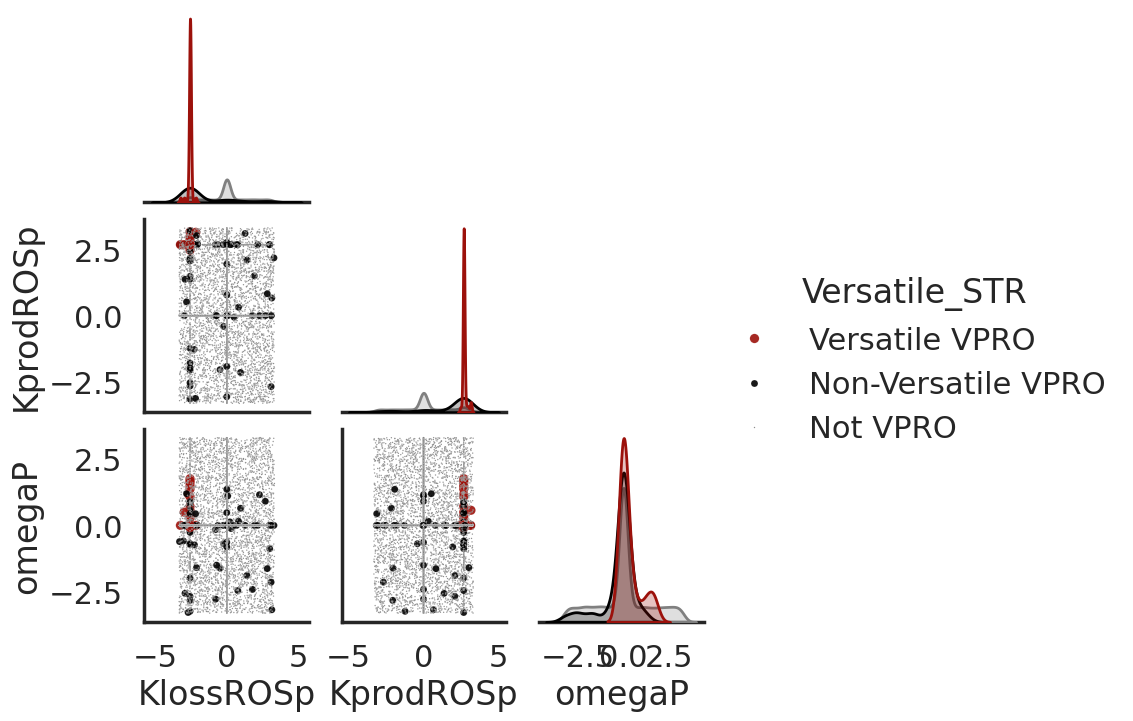

In [251]:
sns.set_context('poster')
 

sns.pairplot(
    data=pmparams_df, 
    vars=['KlossROSp', 'KprodROSp','omegaP'],
     corner=True,
    #plot_kws=dict(s=10),
    
    diag_kws=dict(common_norm=False),    
    #common_norm=False,
    hue='Versatile_STR', hue_order=list(reversed(vorder)), palette=list(reversed(vpalette)),
    plot_kws=dict(size=pmparams_df['Versatile_STR'], sizes=dict(reversed(list(zip(vorder, [1, 25,45])))), alpha=0.9),
    #,
    #lw=10,
    #kind='kde', 
    #facet_kws=dict(sharey=False, margin_titles=True),
)#.set_titles(col_template='{col_name}', row_template='{row_name}')


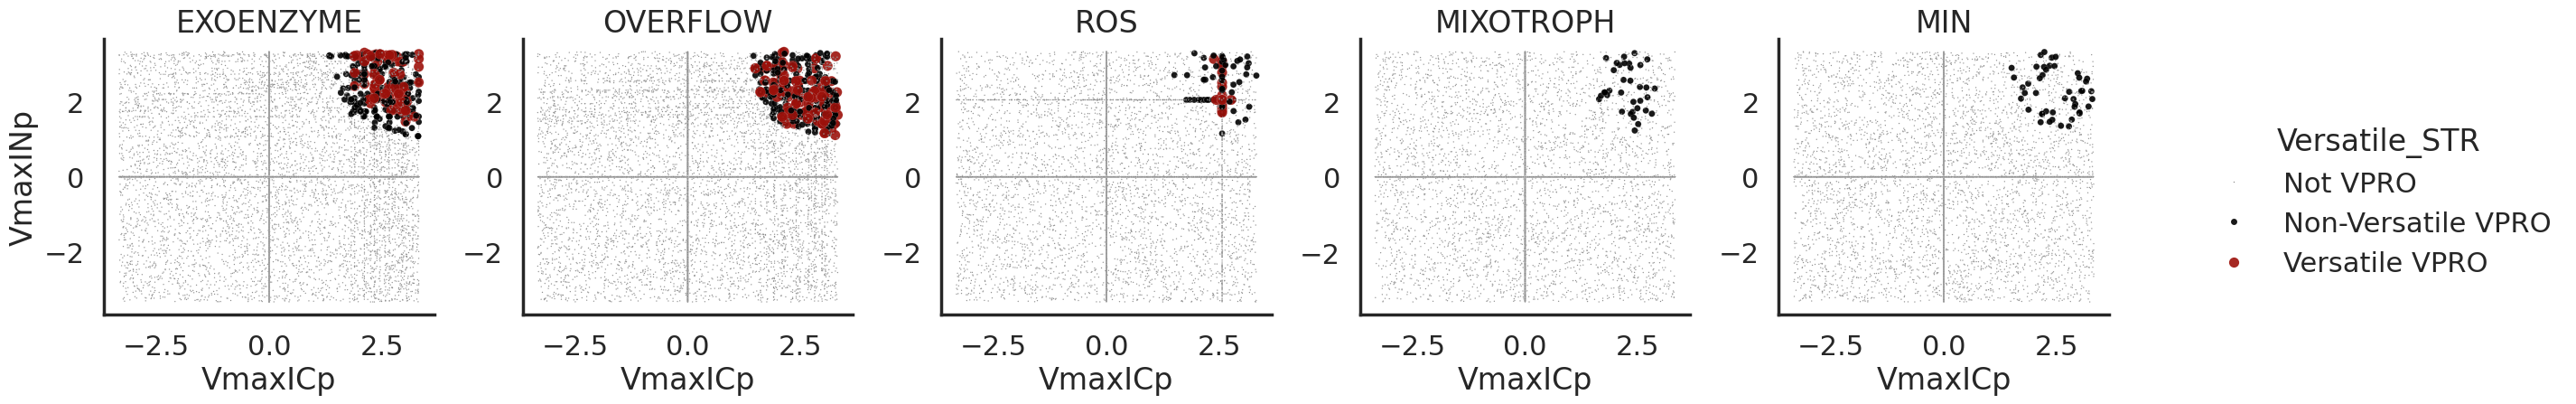

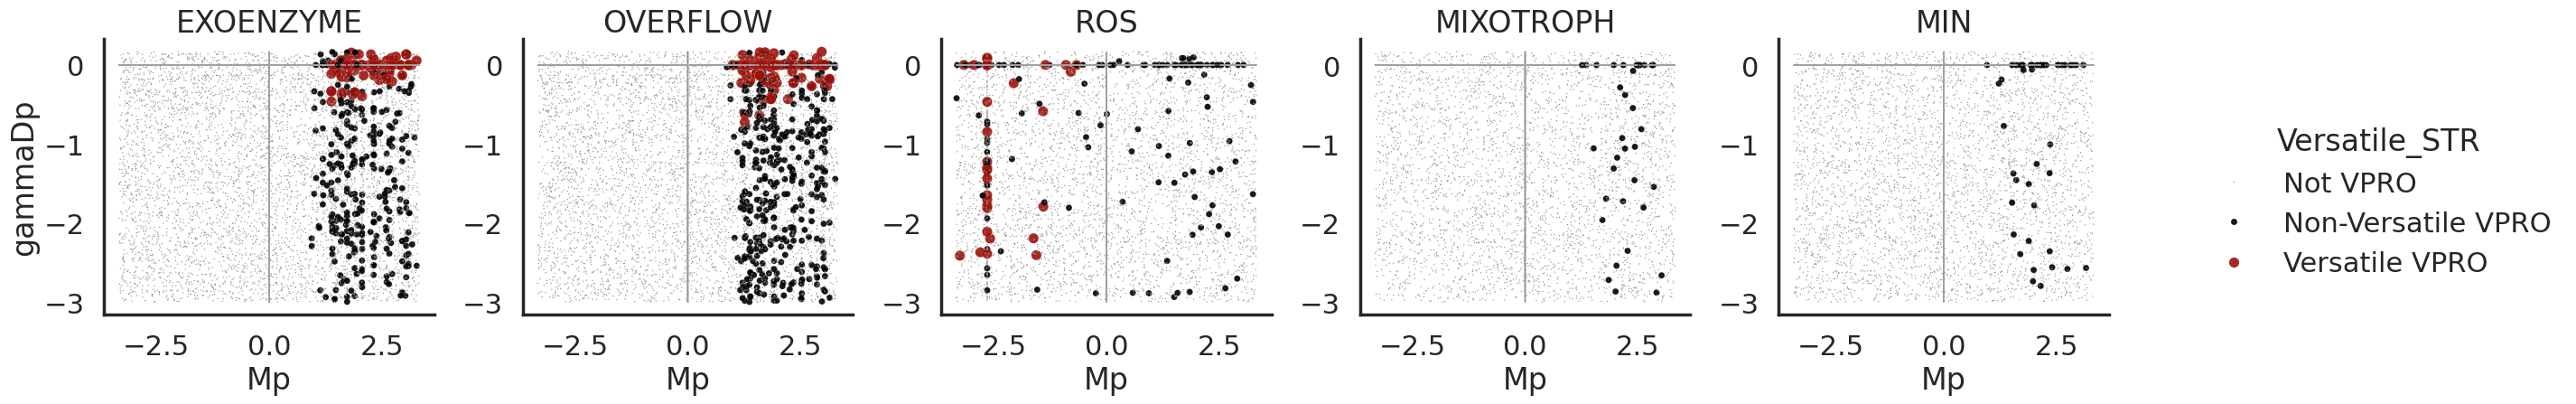

In [252]:
sns.set_context('poster')
 
for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
    sns.relplot(
        data=pmparams_df, 
        #common_norm=False,
        x=i, y=j,
        col='model', col_order=morder,
        hue='Versatile_STR', hue_order=vorder, palette=vpalette,
        #s=10,
        size='Versatile_STR', sizes=dict(zip(vorder, [1, 25,65])), alpha=0.9,
        #lw=10,
        #kind='kde', 
        facet_kws=dict(sharey=False, margin_titles=True),
    ).set_titles(col_template='{col_name}', row_template='{row_name}')


In [212]:
mparams_df

run_id  \
0       monte_ponly_EXOENZYME_86_monte__38_lowN_ponly_...   
1       monte_ponly_EXOENZYME_23_monte__20_lowN_ponly_...   
2       monte_ponly_EXOENZYME_20_monte__81_lowN_ponly_...   
3       monte_ponly_EXOENZYME_77_monte__35_lowN_ponly_...   
4       monte_ponly_EXOENZYME_35_monte__45_lowN_ponly_...   
...                                                   ...   
421564  monte_ponly_MIN_46_monte__45_lowN_ponly_MIN_h-...   
421565  monte_ponly_MIN_95_monte__88_lowN_ponly_MIN_h-...   
421566  monte_ponly_MIN_34_monte__9_lowN_ponly_MIN_h-4...   
421567  monte_ponly_MIN_67_monte__91_lowN_ponly_MIN_h-...   
421568  monte_ponly_MIN_13_monte__27_lowN_ponly_MIN_h-...   

                                                 idx         run  \
0       monte_ponly_EXOENZYME_86_monte__38_EXOENZYME  init_ponly   
1       monte_ponly_EXOENZYME_23_monte__20_EXOENZYME  init_ponly   
2       monte_ponly_EXOENZYME_20_monte__81_EXOENZYME  init_ponly   
3       monte_ponly_EXOENZYME_77_monte__35_EXOENZYME  init_ponly   
4       monte_ponly_EXOENZYME_35_monte__45_EXOENZYME  init_ponly   
...                                              ...         ...   
421564              monte_ponly_MIN_46_monte__45_MIN  init_ponly   
421565              monte_ponly_MIN_95_monte__88_MIN  init_ponly   
421566               monte_ponly_MIN_34_monte__9_MIN  init_ponly   
421567              monte_ponly_MIN_67_monte__91_MIN  init_ponly   
421568              monte_ponly_MIN_13_monte__27_MIN  init_ponly   

                                        id      model        VPRO_nocluster  \
0       monte_ponly_EXOENZYME_86_monte__38  EXOENZYME  vpro_86_38_EXOENZYME   
1       monte_ponly_EXOENZYME_23_monte__20  EXOENZYME  vpro_23_20_EXOENZYME   
2       monte_ponly_EXOENZYME_20_monte__81  EXOENZYME  vpro_20_81_EXOENZYME   
3       monte_ponly_EXOENZYME_77_monte__35  EXOENZYME  vpro_77_35_EXOENZYME   
4       monte_ponly_EXOENZYME_35_monte__45  EXOENZYME  vpro_35_45_EXOENZYME   
...                                    ...        ...                   ...   
421564        monte_ponly_MIN_46_monte__45        MIN        vpro_46_45_MIN   
421565        monte_ponly_MIN_95_monte__88        MIN        vpro_95_88_MIN   
421566         monte_ponly_MIN_34_monte__9        MIN         vpro_34_9_MIN   
421567        monte_ponly_MIN_67_monte__91        MIN        vpro_67_91_MIN   
421568        monte_ponly_MIN_13_monte__27        MIN        vpro_13_27_MIN   

       Versatile_STR variable     value   default        FC  
0           Not VPRO  VmaxICp  0.000006  0.000006  0.000000  
1           Not VPRO  VmaxICp  0.000005  0.000006 -0.277900  
2           Not VPRO  VmaxICp  0.000004  0.000006 -0.312912  
3           Not VPRO  VmaxICp  0.000006  0.000006  0.000000  
4           Not VPRO  VmaxICp  0.000054  0.000006  3.281868  
...              ...      ...       ...       ...       ...  
421564      Not VPRO  gammaDp  0.204770  0.800000 -1.965994  
421565      Not VPRO  gammaDp  0.214862  0.800000 -1.896588  
421566      Not VPRO  gammaDp  0.800000  0.800000  0.000000  
421567      Not VPRO  gammaDp  0.800000  0.800000  0.000000  
421568      Not VPRO  gammaDp  0.852159  0.800000  0.091123  

[421569 rows x 11 columns]